# Simple Multiple Stocks

In [1]:
options(warn=-1) #Ignore Warning

In [2]:
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
# Create new environment
data_env <- new.env()
# Use getSymbols to load data into the environment
getSymbols(c("AAPL", "AMD", "INTC", "MSFT"), env = data_env, auto.assign = TRUE)


'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "AAPL" "AMD"  "INTC" "MSFT"

In [4]:
head(data_env$AAPL, 3)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.573566
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.630688
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.611954

In [5]:
eapply(data_env, head)

$AAPL
           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.573566
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.630688
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.611954
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.624853
2007-01-09  3.087500  3.320714 3.041071   3.306071  3349298400      2.842900
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.978950

$AMD
           AMD.Open AMD.High AMD.Low AMD.Close AMD.Volume AMD.Adjusted
2007-01-03    20.08    20.40   19.35     19.52   28350300        19.52
2007-01-04    19.66    19.86   19.32     19.79   23652500        19.79
2007-01-05    19.54    19.91   19.54     19.71   15902400        19.71
2007-01-08    19.71    19.86   19.37     19.47   15814800        19.47
2007-01-09    19.45    19.71   19.37     19.65   14494200        19.65
2007-01-10    19.64    

In [6]:
# Call head on each object in data_env using eapply
data_list <- eapply(data_env, head)

In [7]:
# Merge all the list elements into one xts object
data_merged <- do.call(merge, data_list)


In [8]:
data_ohlc <- OHLC(data_merged)
data_ohlc

           AAPL.Open AMD.Open MSFT.Open INTC.Open AAPL.High AMD.High MSFT.High
2007-01-03  3.081786    20.08     29.91     20.45  3.092143    20.40     30.25
2007-01-04  3.001786    19.66     29.70     20.63  3.069643    19.86     29.97
2007-01-05  3.063214    19.54     29.63     21.09  3.078571    19.91     29.75
2007-01-08  3.070000    19.71     29.65     21.25  3.090357    19.86     30.10
2007-01-09  3.087500    19.45     30.00     21.18  3.320714    19.71     30.18
2007-01-10  3.383929    19.64     29.80     21.09  3.492857    20.02     29.89
           INTC.High AAPL.Low AMD.Low MSFT.Low INTC.Low AAPL.Close AMD.Close
2007-01-03     20.88 2.925000   19.35    29.40    20.14   2.992857     19.52
2007-01-04     21.33 2.993571   19.32    29.44    20.56   3.059286     19.79
2007-01-05     21.15 3.014286   19.54    29.45    20.76   3.037500     19.71
2007-01-08     21.34 3.045714   19.37    29.53    20.95   3.052500     19.47
2007-01-09     21.21 3.041071   19.37    29.73    20.86   3.30

In [9]:
# Extract volume column from each object
adjusted_list <- lapply(data_env, Ad)
# Merge each list element into one object
adjusted <- do.call(merge, adjusted_list)
head(adjusted)

           AAPL.Adjusted AMD.Adjusted MSFT.Adjusted INTC.Adjusted
2007-01-03      2.573566        19.52      21.91154      13.29359
2007-01-04      2.630688        19.79      21.87483      13.82926
2007-01-05      2.611954        19.71      21.75009      13.78353
2007-01-08      2.624853        19.47      21.96289      13.72473
2007-01-09      2.842900        19.65      21.98492      13.73780
2007-01-10      2.978950        20.01      21.76477      14.05790

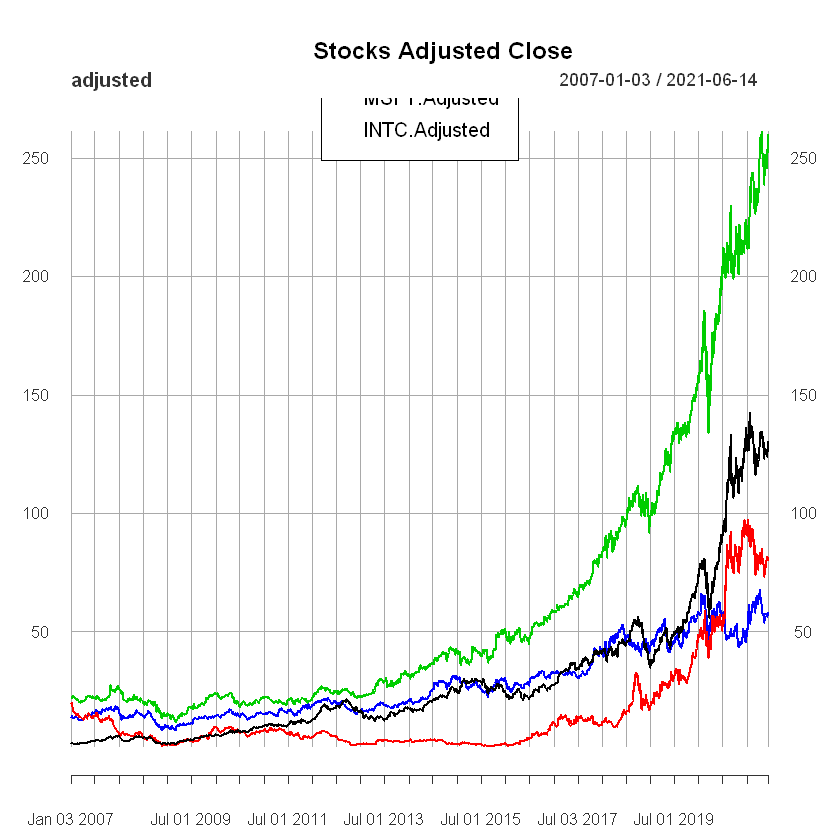

In [10]:
plot(adjusted)
title("Stocks Adjusted Close")
legend(x="top", legend=colnames(adjusted))